In [13]:
import pandas as pd
import re
from nltk import pos_tag
from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
import math
from tqdm import tqdm
from sklearn.decomposition import TruncatedSVD
import pickle
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import keras
from keras.layers import merge, Input,InputLayer
from keras.engine import InputLayer
from keras.layers import Dense, Activation
from keras.layers.core import Activation, Dense, Flatten
from keras.models import Sequential
from keras.layers import Dense

ImportError: No module named 'keras'

In [485]:

stop=['href','com','rel','@','http','https','all','i',	'me',	'my',	'myself',	'we',	'our',	'ours',	'ourselves',	'you',	"you're",	"you've",	"you'll",	"you'd",	'your',	'yours',	'yourself',	'yourselves',	'he',	'him',	'his',	'himself',	'she',	"she's",	'her',	'hers',	'herself',	'it',	"it's",	'its',	'itself',	'they',	'them',	'their',	'theirs',	'themselves',	'what',	'which',	'who',	'whom',	'this',	'that',	"that'll",	'these',	'those',	'am',	'is',	'are',	'was',	'were',	'be',	'been',	'being',	'have',	'has',	'had',	'having',	'do',	'does',	'did',	'doing',	'a',	'an',	'the',	'and',	'but',	'if',	'or',	'because',	'as',	'until',	'while',	'of',	'by',	'for',	'with',	'against',		'into',	'through',	'during',	'before',	'after',		'to',			'down',	'in',	'out',	'over',	'under',	'again',	'further',	'then',	'once',	'here',	'there',	'when',	'where',	'why',	'how',	'all',	'any',		'each',	'few',	'more',	'most',	'other',	'some',	'such',	'no',	'nor',	'not',	'only',	'own',	'same',	'so',	'than',	'too',	'very',	's',	't',	'can',	'will',	'just',	'don',	"don't",	'should',	"should've",	'now',	'd',	'll',	'm',	'o',	're',	've',	'y',	'ain',	'aren',	"aren't",	'couldn',	"couldn't",	'didn',	"didn't",	'doesn',	"doesn't",	'hadn',	"hadn't",	'hasn',	"hasn't",	'haven',	"haven't",	'isn',	"isn't",	'ma',	'mightn',	"mightn't",	'mustn',	"mustn't",	'needn',	"needn't",	'shan',	"shan't",	'shouldn',	"shouldn't",	'wasn',	"wasn't",	'weren',	"weren't",	'won',	"won't",	'wouldn',	"wouldn't","nbsp"]

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def pre_processing(row=''):
    try:
        if len(row)!=0:

            raw_text=re.sub('[^a-zA-Z]+', ' ', row).lower()
            raw_text=word_tokenize(raw_text)    
            remove_stop=[i for i in raw_text if i not in stop ]
            lemmatizer = WordNetLemmatizer()
            row=" ".join(lemmatizer.lemmatize(word,get_wordnet_pos(pos_tag)) for word,pos_tag in pos_tag(remove_stop))
            return row
        else:
            return None
    except Exception as e:
#         print(e)
#         print(row)
        return None

In [486]:
main_data=pd.read_excel('./tweets.xlsx',parse_dates=['TweetPostedTime','UserSignupDate'],dayfirst=True)

In [487]:
main_data.head()

,TweetPostedTime,TweetID,TweetBody,TweetRetweetFlag,TweetSource,TweetInReplyToStatusID,TweetInReplyToUserID,TweetInReplyToScreenName,TweetRetweetCount,TweetFavoritesCount,...,UserDescription,UserLink,UserExpandedLink,UserFollowersCount,UserFriendsCount,UserListedCount,UserSignupDate,UserTweetCount,MacroIterationNumber,tweet.place
0,2016-12-20 10:57:00,811163485052817408,RT @BeachyMaldives: Local interaction is a gre...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,...,Pls donate 2 https://t.co/RvOUK9lAWI #YearEndG...,https://t.co/jghZVBsiQF,http://cjqenterprises.com,6334,6144,1917,2015-06-14 22:36:15,33556,0,NaN
1,2016-12-20 10:56:59,811163483463122944,RT @TechTerraEd: Need #giftideas for your kid(...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,...,"Educator of students with special needs, Mothe...",NaN,NaN,154,371,180,2010-01-02 13:36:23,3201,0,NaN
2,2016-12-20 10:56:55,811163466387988480,Seven Questions Before Choosing a Cruise Line ...,False,"<a href=""http://www.google.com/"" rel=""nofollow...",NaN,NaN,NaN,0,0,...,Thrifty Mom Media social media consulting and ...,https://t.co/cEhGzaQJp6,http://www.thriftymommastips.com/,23433,24762,961,2009-05-26 21:26:09,147958,0,NaN
3,2016-12-20 10:56:55,811163465125679104,"RT @CMGsportsclub: Yoga do Brasil, un havre de...",True,"<a href=""https://roundteam.co"" rel=""nofollow"">...",NaN,NaN,NaN,1,0,...,"Adventure travel, yoga, paleo, Crossfit, runni...",https://t.co/3IHwXkgAkA,https://primalsanctuary.com,11136,10081,978,2015-09-12 20:29:18,28988,0,NaN
4,2016-12-20 10:56:53,811163457508642817,"RT @StylishRentals: Love this! ""Palm Springs M...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,3065,0,...,I really have got giant ambitions. I start com...,NaN,NaN,55,21,31,2016-09-07 16:22:15,19581,0,NaN


In [488]:
tweet_data=main_data.copy()

In [489]:
threshold=int(len(tweet_data)*0.40)
threshold

16947

In [490]:
col_drop=[]
for i,j in dict(main_data.isna().sum()).items():
    if j>threshold:
        col_drop.append(i)
col_drop        

['TweetInReplyToStatusID', 'TweetInReplyToUserID', 'TweetInReplyToScreenName', 'TweetPlaceID', 'TweetPlaceName', 'TweetPlaceFullName', 'TweetCountry', 'TweetPlaceBoundingBox', 'TweetPlaceAttributes', 'TweetPlaceContainedWithin', 'UserLink', 'UserExpandedLink', 'tweet.place']

In [491]:
col_drop=['TweetInReplyToStatusID',
 'TweetInReplyToUserID', 'TweetInReplyToScreenName',
 'TweetPlaceID', 'TweetPlaceName',
 'TweetPlaceFullName', 'TweetCountry', 'TweetPlaceBoundingBox',
 'TweetPlaceAttributes', 'TweetPlaceContainedWithin',
 'UserLink', 'UserExpandedLink', 'tweet.place']

In [492]:
tweet_data[col_drop].isna().sum()

TweetInReplyToStatusID       42267
TweetInReplyToUserID         42179
TweetInReplyToScreenName     42179
TweetPlaceID                 41368
TweetPlaceName               41368
TweetPlaceFullName           41368
TweetCountry                 41369
TweetPlaceBoundingBox        41368
TweetPlaceAttributes         42368
TweetPlaceContainedWithin    42368
UserLink                     25769
UserExpandedLink             25806
tweet.place                  41368
dtype: int64

In [493]:
tweet_data.drop(labels=col_drop,axis=1,inplace=True)

In [494]:
tweet_data.isna().sum()

TweetPostedTime             0
TweetID                     0
TweetBody                   0
TweetRetweetFlag            0
TweetSource                 0
TweetRetweetCount           0
TweetFavoritesCount         0
TweetHashtags             100
UserID                      0
UserName                    0
UserScreenName              0
UserLocation            16026
UserDescription          4364
UserFollowersCount          0
UserFriendsCount            0
UserListedCount             0
UserSignupDate              0
UserTweetCount              0
MacroIterationNumber        0
dtype: int64

In [495]:
tweet_data.head()

,TweetPostedTime,TweetID,TweetBody,TweetRetweetFlag,TweetSource,TweetRetweetCount,TweetFavoritesCount,TweetHashtags,UserID,UserName,UserScreenName,UserLocation,UserDescription,UserFollowersCount,UserFriendsCount,UserListedCount,UserSignupDate,UserTweetCount,MacroIterationNumber
0,2016-12-20 10:57:00,811163485052817408,RT @BeachyMaldives: Local interaction is a gre...,True,"<a href=""http://twitter.com/download/iphone"" r...",1,0,"Maldives, vacation, travel",3325724261,CjQenterprises,CjQenterprises,United States,Pls donate 2 https://t.co/RvOUK9lAWI #YearEndG...,6334,6144,1917,2015-06-14 22:36:15,33556,0
1,2016-12-20 10:56:59,811163483463122944,RT @TechTerraEd: Need #giftideas for your kid(...,True,"<a href=""http://twitter.com/download/iphone"" r...",1,0,"giftideas, holiday",101222953,monica,mama0004,durham nc,"Educator of students with special needs, Mothe...",154,371,180,2010-01-02 13:36:23,3201,0
2,2016-12-20 10:56:55,811163466387988480,Seven Questions Before Choosing a Cruise Line ...,False,"<a href=""http://www.google.com/"" rel=""nofollow...",0,0,"travel, TTOT",42725028,Paula Schuck,inkscrblr,Canada,Thrifty Mom Media social media consulting and ...,23433,24762,961,2009-05-26 21:26:09,147958,0
3,2016-12-20 10:56:55,811163465125679104,"RT @CMGsportsclub: Yoga do Brasil, un havre de...",True,"<a href=""https://roundteam.co"" rel=""nofollow"">...",1,0,"yoga, bresil, meditation, holiday",3541532718,Primal Sanctuary,primalsanctuary,"Cypress, Texas, USA","Adventure travel, yoga, paleo, Crossfit, runni...",11136,10081,978,2015-09-12 20:29:18,28988,0
4,2016-12-20 10:56:53,811163457508642817,"RT @StylishRentals: Love this! ""Palm Springs M...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",3065,0,Travel,773556998034063360,Joe,biryukovasever2,Providence,I really have got giant ambitions. I start com...,55,21,31,2016-09-07 16:22:15,19581,0


In [496]:
%matplotlib inline
diff_year=pd.Series((tweet_data.TweetPostedTime.dt.year - tweet_data.UserSignupDate.dt.year)*12)

diff_month = pd.Series(tweet_data.TweetPostedTime.dt.month - tweet_data.UserSignupDate.dt.month)

tweet_data['tenure_in_month'] = pd.Series(diff_year+diff_month)

tweet_data.drop(labels=['UserSignupDate','TweetPostedTime'],axis=1,inplace=True)

In [497]:
char_col=[]
num_col=[]
for col in tweet_data.columns:
    if tweet_data[col].dtype=='object':
        char_col.append(col)
    else:
        num_col.append(col)

In [498]:
tweet_data[char_col]=tweet_data[char_col].fillna('')

In [499]:
tweet_data[char_col].isna().sum()

TweetBody          0
TweetSource        0
TweetHashtags      0
UserName           0
UserScreenName     0
UserLocation       0
UserDescription    0
dtype: int64

In [500]:
tweet_data['concat_text'] = tweet_data.TweetBody + ' ' +  tweet_data.TweetSource + ' ' + tweet_data.TweetHashtags + ' '+ tweet_data.UserLocation +' '+ tweet_data.UserDescription

In [501]:
tqdm.pandas()
tweet_data.concat_text=tweet_data.concat_text.progress_apply(pre_processing)

100%|███████████████████████████████████| 42368/42368 [03:10<00:00, 222.14it/s]


In [502]:
X= tweet_data.concat_text
bow_transformer = CountVectorizer().fit(X)
X = bow_transformer.fit_transform(X)

In [503]:
X.shape

(42368, 74673)

In [511]:
# save the classifier
with open('bow_trans.pkl', 'wb') as fid:
    pickle.dump(bow_transformer, fid)    


In [505]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# X= tweet_data.concat_text
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(X.T)

In [ ]:
scale=StandardScaler()
scale.fit(X)
scaled_data_svd=scale.transform(scaled_data_in)

In [532]:
svd = TruncatedSVD(n_components = 110, n_iter=7, random_state=42)

In [533]:
svd.fit(scaled_data_svd.T)

TruncatedSVD(algorithm='randomized', n_components=110, n_iter=7,
       random_state=42, tol=0.0)

In [534]:
svd.transform(scaled_data_svd.T)

array([[ 0.14325847,  0.13401238, -0.11450353, ...,  0.05879989,
         0.10578671, -0.00803007],
       [ 0.02404746,  0.01159884,  0.02531538, ..., -0.00299409,
        -0.00769984,  0.01327882],
       [ 0.00483591,  0.00127368,  0.00159894, ..., -0.00088288,
         0.00065555, -0.00135973],
       ...,
       [ 0.00454318,  0.00207745,  0.0018911 , ..., -0.00094777,
        -0.01226723, -0.00091272],
       [ 0.00380038,  0.00278083, -0.00556789, ..., -0.00035456,
        -0.00109749,  0.00206757],
       [ 0.02332934,  0.01222821, -0.01049056, ...,  0.01197578,
        -0.02263038, -0.01233291]])

In [535]:
 print(svd.explained_variance_ratio_.sum()) 

0.6221513744711199


In [536]:
with open('svd.pkl', 'wb') as fid:
    pickle.dump(svd, fid)    

In [108]:
svd_data = svd.components_.T

In [109]:
tweet_data[num_col].drop(labels=['TweetRetweetFlag','TweetID','UserID','TweetRetweetCount'],axis=1,inplace=False).corr()

,TweetFavoritesCount,UserFollowersCount,UserFriendsCount,UserListedCount,UserTweetCount,MacroIterationNumber,tenure_in_month
TweetFavoritesCount,1.000000,0.031358,0.018708,0.009973,-0.003033,0.005040,0.021195
UserFollowersCount,0.031358,1.000000,0.714140,0.493029,0.154184,-0.010877,0.122127
UserFriendsCount,0.018708,0.714140,1.000000,0.503876,0.352575,-0.020666,0.166581
UserListedCount,0.009973,0.493029,0.503876,1.000000,0.532808,0.001354,0.269027
UserTweetCount,-0.003033,0.154184,0.352575,0.532808,1.000000,0.002116,0.204573
MacroIterationNumber,0.005040,-0.010877,-0.020666,0.001354,0.002116,1.000000,-0.076680
tenure_in_month,0.021195,0.122127,0.166581,0.269027,0.204573,-0.076680,1.000000


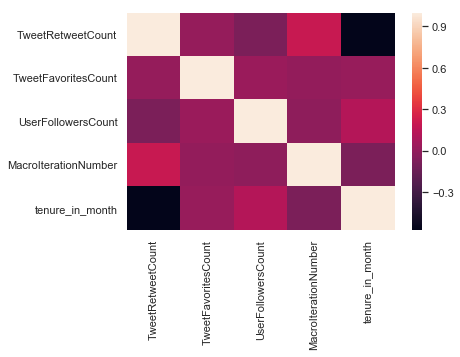

In [164]:
sns.set()
ax = sns.heatmap(tweet_data[num_col].drop(labels=['UserFriendsCount','TweetRetweetFlag','UserListedCount','UserTweetCount','TweetID','UserID'],axis=1,inplace=False).corr())


In [300]:
scaled_data_in = tweet_data[num_col].drop(labels=['TweetRetweetCount','UserFriendsCount','UserTweetCount','TweetRetweetFlag','UserListedCount','TweetID','UserID'],axis=1,inplace=False)

In [301]:
scale=StandardScaler()
scale.fit(scaled_data_in)
scaled_data=pd.DataFrame(scale.transform(scaled_data_in),columns=list(scaled_data_in.columns))

C:\Users\uesr\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\uesr\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [302]:
scale.fit(svd_data)

svd_data = pd.DataFrame(scale.transform(svd_data))

In [299]:
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
# from collections import Counter

# from sklearn.preprocessing import StandardScaler
# kmeans = KMeans(n_clusters=2, random_state=0).fit(pd.concat([svd_data,scaled_data],axis=1))
# y_label=kmeans.predict(pd.concat([svd_data,scaled_data],axis=1))

# Counter(y_label)

# # train_data=pd.concat([svd_data,scaled_data,tweet_data.TweetRetweetCount],axis=1)
# train_data = pd.concat([svd_data,scaled_data],axis=1)

# train_data['cluster']=y_label

# train_data['TweetRetweetCount']=tweet_data.TweetRetweetCount

# train_data.TweetRetweetCount[train_data.cluster==1].max()

# train_data.loc[train_data.cluster==2,:]['TweetRetweetCount'].max()

# train_data.head()

# y_final = tweet_data.TweetRetweetCount

# tweet_data.TweetRetweetCount.max()

# train_data.head()

# train_data['target_class']=None
# train_data.loc[train_data.TweetRetweetCount==0,'target_class'] = 0
# train_data.loc[train_data.TweetRetweetCount!=0,'target_class'] = 1

# train_data.drop('TweetRetweetCount',axis=1,inplace=True)

# train_data.target_class.value_counts()

# y=train_data.target_class
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(train_data.drop('target_class',axis=1,inplace=False), y, test_size=0.2, random_state=101)

# from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression(random_state=0, solver='lbfgs',
#                           multi_class='multinomial').fit(X_train,y_train)
# clf.score(X_train,y_train)

# sum((clf.predict(X_test)==y_test)/len(y_test))

# train_data_1=train_data.loc[train_data.target_class==1,:]

# train_data_1.head()

# y_final = tweet_data.TweetRetweetCount[tweet_data.TweetRetweetCount!=0]
# y_final.shape

# y_final.apply(np.sqrt).hist()

# from sklearn.preprocessing import StandardScaler
# scale=StandardScaler()
# scale.fit(X_train)

# final_data=scale.transform(X_train)

# from sklearn.linear_model import LinearRegression
# reg = LinearRegression().fit(X_train, y_train)

# reg.score(X_train, y_train)

# reg.score(X_test,y_test)

# pd.DataFrame({'actual':y_test,'predicted':reg.predict(X_test)}).to_csv('./results_tweet.csv',index=False)

# reg.score(X_test,y_test)

In [304]:
train_data=pd.concat([svd_data,scaled_data],axis=1)
train_data['TweetRetweetCount'] =tweet_data.TweetRetweetCount

In [305]:

X_train, X_test, y_train, y_test = train_test_split(train_data.drop('TweetRetweetCount',axis=1,inplace=False), tweet_data.TweetRetweetCount, test_size=0.3, random_state=101)

In [333]:

grd_model=GradientBoostingRegressor(n_estimators=100)
grd_model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [388]:
# save the classifier
with open('grd_boost.pkl', 'wb') as fid:
    pickle.dump(grd_model, fid)    

In [373]:
print(grd_model.score(X_train,y_train))
grd_model.score(X_test,y_test)

0.996912142470335


0.993258777174273

In [338]:
pd.DataFrame({'actual':y_test,'predicted':grd_model.predict(X_test)}).to_csv('./results_tweet_grd.csv',index=False)

In [317]:


model = Sequential()
model.add(Dense(32,input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1,kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                3680      
_________________________________________________________________
dense_17 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_18 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_19 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 257       
Total params: 47,393
Trainable params: 47,393
Non-trainable params: 0
_________________________________________________________________


In [320]:
model.fit(x=X_train, y=y_train, epochs=20, batch_size=128)

Epoch 1/20
29657/29657 [==============================] - ETA: 1s - loss: 5643.9541 - acc: 0.00 - ETA: 1s - loss: 4200.5734 - acc: 0.01 - ETA: 1s - loss: 3774.5651 - acc: 0.02 - ETA: 0s - loss: 3522.1247 - acc: 0.04 - ETA: 0s - loss: 3419.2900 - acc: 0.05 - ETA: 0s - loss: 3483.6392 - acc: 0.04 - ETA: 0s - loss: 3394.3874 - acc: 0.04 - ETA: 0s - loss: 4797.2740 - acc: 0.05 - ETA: 0s - loss: 4679.1727 - acc: 0.05 - ETA: 0s - loss: 4510.0407 - acc: 0.04 - ETA: 0s - loss: 4368.6974 - acc: 0.04 - ETA: 0s - loss: 4240.9497 - acc: 0.05 - ETA: 0s - loss: 4163.1625 - acc: 0.05 - ETA: 0s - loss: 4072.6465 - acc: 0.05 - ETA: 0s - loss: 4053.8894 - acc: 0.05 - ETA: 0s - loss: 3955.5901 - acc: 0.05 - ETA: 0s - loss: 4048.2180 - acc: 0.05 - ETA: 0s - loss: 3954.2266 - acc: 0.05 - ETA: 0s - loss: 3937.3645 - acc: 0.05 - ETA: 0s - loss: 3948.4960 - acc: 0.05 - 1s 34us/step - loss: 3949.1829 - acc: 0.0494
Epoch 2/20
29657/29657 [==============================] - ETA: 1s - loss: 5872.8115 - acc: 0.01 -

29657/29657 [==============================] - ETA: 1s - loss: 2079.9902 - acc: 0.00 - ETA: 0s - loss: 2809.2977 - acc: 0.04 - ETA: 0s - loss: 2592.4549 - acc: 0.04 - ETA: 0s - loss: 2560.1002 - acc: 0.04 - ETA: 0s - loss: 2468.7745 - acc: 0.05 - ETA: 0s - loss: 2561.6153 - acc: 0.05 - ETA: 0s - loss: 2700.2123 - acc: 0.05 - ETA: 0s - loss: 2661.1948 - acc: 0.05 - ETA: 0s - loss: 2573.9123 - acc: 0.05 - ETA: 0s - loss: 2589.7762 - acc: 0.05 - ETA: 0s - loss: 2599.1785 - acc: 0.05 - ETA: 0s - loss: 2581.2763 - acc: 0.05 - ETA: 0s - loss: 2747.5063 - acc: 0.05 - ETA: 0s - loss: 2848.7850 - acc: 0.06 - ETA: 0s - loss: 3584.9777 - acc: 0.05 - ETA: 0s - loss: 3548.9324 - acc: 0.05 - ETA: 0s - loss: 3511.4670 - acc: 0.05 - ETA: 0s - loss: 3443.9145 - acc: 0.05 - ETA: 0s - loss: 3387.3378 - acc: 0.05 - ETA: 0s - loss: 3386.0090 - acc: 0.05 - ETA: 0s - loss: 3330.3545 - acc: 0.05 - ETA: 0s - loss: 3251.3036 - acc: 0.05 - ETA: 0s - loss: 3190.2505 - acc: 0.05 - ETA: 0s - loss: 3150.2411 - acc: 

In [387]:
model.save('./nn_model.h5')

In [353]:
predicted_val=pd.Series(model.predict(X_test)[:,0])

predicted_val[predicted_val<0]=0

predicted_val=predicted_val.astype(int)

In [368]:
pd.DataFrame({'actual':y_test.reset_index(drop=True),'predicted':predicted_val}).to_csv('./results_tweet.csv',index=False)

In [515]:
new_test = main_data.sample(100)

In [516]:
# col_drop=['TweetInReplyToStatusID',
#  'TweetInReplyToUserID', 'TweetInReplyToScreenName',
#  'TweetPlaceID', 'TweetPlaceName',
#  'TweetPlaceFullName', 'TweetCountry', 'TweetPlaceBoundingBox',
#  'TweetPlaceAttributes', 'TweetPlaceContainedWithin',
#  'UserLink', 'UserExpandedLink', 'tweet.place']

# new_test.drop(labels=col_drop,axis=1,inplace=True)

In [517]:
diff_year_=pd.Series((new_test.TweetPostedTime.dt.year - new_test.UserSignupDate.dt.year)*12)

diff_month_ = pd.Series(new_test.TweetPostedTime.dt.month - new_test.UserSignupDate.dt.month)

new_test['tenure_in_month'] = pd.Series(diff_year_+diff_month_)

new_test.drop(labels=['UserSignupDate','TweetPostedTime'],axis=1,inplace=True)

In [518]:
new_test.fillna('',inplace=True)

In [519]:
new_test['concat_text'] = new_test.TweetBody + ' ' +  new_test.TweetSource + ' ' + new_test.TweetHashtags + ' '+ new_test.UserLocation +' '+ new_test.UserDescription

tqdm.pandas()
new_test.concat_text=new_test.concat_text.progress_apply(pre_processing)

100%|███████████████████████████████████████| 100/100 [00:00<00:00, 229.09it/s]


In [521]:
with open('./bow_trans.pkl', 'rb') as f:
    test_bow = pickle.load(f)

In [522]:
test_bow.transform(new_test.concat_text)

<100x74673 sparse matrix of type '<class 'numpy.int64'>'
	with 2752 stored elements in Compressed Sparse Row format>

In [523]:
new_test_X=test_bow.transform(new_test.concat_text)

In [538]:
with open('./svd.pkl', 'rb') as f:
    test_svd = pickle.load(f)

In [539]:
train_col=['TweetFavoritesCount', 'UserFollowersCount', 'MacroIterationNumber',
       'tenure_in_month']

In [540]:
new_test_X.shape

(100, 74673)

In [542]:
test_svd_data=test_svd.transform(new_test_X.T)

In [430]:
scale=StandardScaler()
scale.fit(new_test_X)
new_test_X=scale.transform(new_test_X)

(100, 74673)

In [546]:
final_test_data=pd.concat([new_test_X,new_test[train_col]])

In [ ]:
with open('./grd_boost.pkl', 'rb') as f:
    test_grd = pickle.load(f)

In [ ]:
test_pred_grd=test_grd.predict(final_test_data)

In [ ]:
from keras.models import load_model
test_model_nn = load_model('./nn_model.h5')

In [ ]:
test_pred_nn = test_model_nn.predict(final_test_data)